# Bid data and Artificial Intelligence Project using keras
Team 29: Phuong Huynh, Saswati Mohanty, Vishal Vindyala, Wanchi Lee



Importing Libraries

In [1]:
#Importing the libraries
import math 
import matplotlib.pyplot as plt 
from ipywidgets import widgets, interact, Layout
import pandas as pd
import numpy as  np
import tensorflow as tf
from tensorflow import keras

Reading text and train data

In [3]:
#read data for train and test
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

Data pre-processing

In [10]:
df_train.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      False   False   False   False   False   False   False   False   False   
1      False   False   False   False   False   False   False   False   False   
2      False   False   False   False   False   False   False   False   False   
3      False   False   False   False   False   False   False   False   False   
4      False   False   False   False   False   False   False   False   False   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995  False   False   False   False   False   False   False   False   False   
41996  False   False   False   False   False   False   False   False   False   
41997  False   False   False   False   False   False   False   False   False   
41998  False   False   False   False   False   False   False   False   False   
41999  False   False   False   False   False   False   Fal

In [4]:
#Changing data types for some variables
train_labels = df_train['label'].values
train_images = (df_train.iloc[:,1:].values).astype('float32')
test_images = (df_test.iloc[:,:].values).astype('float32')



In [5]:
#Reshaping the data
train_images = train_images.reshape(train_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)

In [6]:
#Normalizing training data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
class_names = {index:cn for index, cn in enumerate(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])}

# Plotting the training dataset images


2


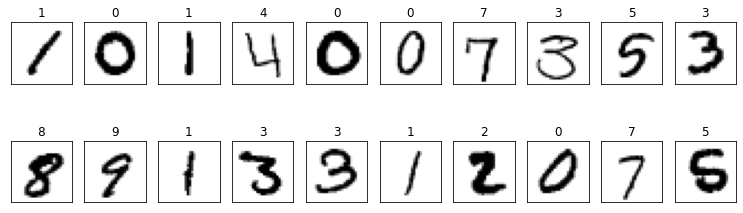

In [8]:
#Function for plot
def plot(images, labels, predictions=None):
    # create a grid with 10 columns
    n_cols = min(10, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols + 3, n_rows + 2))
    if predictions is None:
        predictions = [None] * len(labels)
    for index, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[index]
        ax.imshow(x, cmap=plt.cm.binary)
        ax.set_title(class_names[y_true])
        if y_pred is not None:
            ax.set_xlabel(class_names[y_pred])
        ax.set_xticks([])
        ax.set_yticks([])

# plot first n images
i = int(input("Enter the number of rows of images: "))
plot(train_images[:i*10], train_labels[:i*10])   

# Training Neural network model in Keras

In [9]:
# Using multiple layers of keras layer functions for modelling
model = keras.Sequential(layers=[
    keras.layers.Conv2D(64,kernel_size=3,input_shape=(28,28,1),activation='relu'),
    keras.layers.AveragePooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),
    keras.layers.GaussianDropout(0.5),
    keras.layers.Conv2D(32,kernel_size=3,input_shape=(28,28,1),activation='relu'),
    keras.layers.AveragePooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),
    keras.layers.GaussianDropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10, activation="softmax"),
])
#defining the epoch and batch size to fit the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, batch_size=60, epochs=40, validation_split=0.2)

Epoch 1/40
560/560 [==============================] - 46s 80ms/step - loss: 0.2866 - accuracy: 0.9085 - val_loss: 0.2033 - val_accuracy: 0.9361
Epoch 2/40
560/560 [==============================] - 45s 80ms/step - loss: 0.1029 - accuracy: 0.9679 - val_loss: 0.0502 - val_accuracy: 0.9830
Epoch 3/40
560/560 [==============================] - 45s 80ms/step - loss: 0.0799 - accuracy: 0.9745 - val_loss: 0.0457 - val_accuracy: 0.9851
Epoch 4/40
560/560 [==============================] - 45s 80ms/step - loss: 0.0708 - accuracy: 0.9774 - val_loss: 0.0358 - val_accuracy: 0.9893
Epoch 5/40
560/560 [==============================] - 45s 80ms/step - loss: 0.0614 - accuracy: 0.9815 - val_loss: 0.0362 - val_accuracy: 0.9890
Epoch 6/40
560/560 [==============================] - 45s 80ms/step - loss: 0.0529 - accuracy: 0.9826 - val_loss: 0.0359 - val_accuracy: 0.9899
Epoch 7/40
560/560 [==============================] - 45s 80ms/step - loss: 0.0520 - accuracy: 0.9829 - val_loss: 0.0420 - val_accuracy:

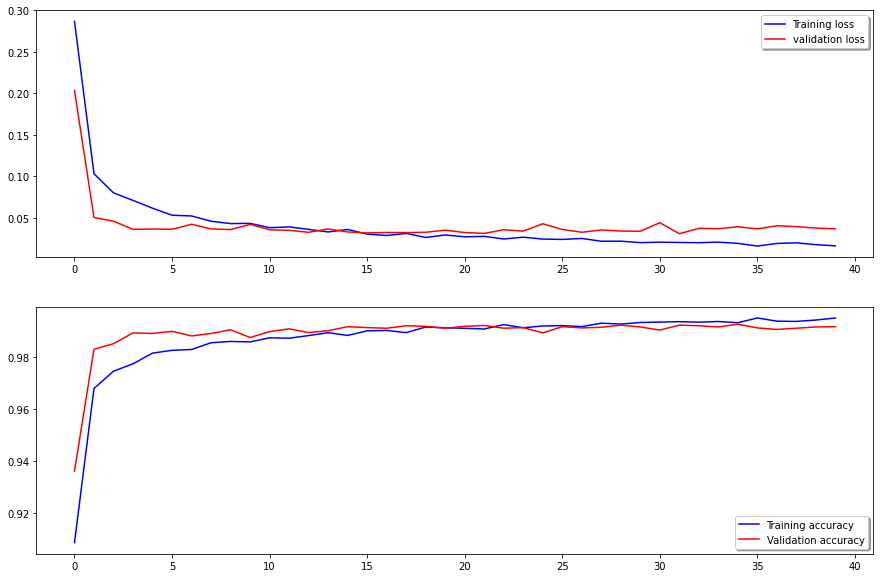

In [11]:
#data visualiaztion of loss and accuracy function
# plot 1: Loss
fig, ax = plt.subplots(2,1, figsize=(15, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

# plot 2: accuracy
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# *Prediction*

In [12]:
#Prediction for test dataset
preds = model.predict(test_images).argsort()[:,-1]
print(preds)

[2 0 9 ... 3 9 2]


Visualizing predictions

How many rows of prediction do you want to see? 2


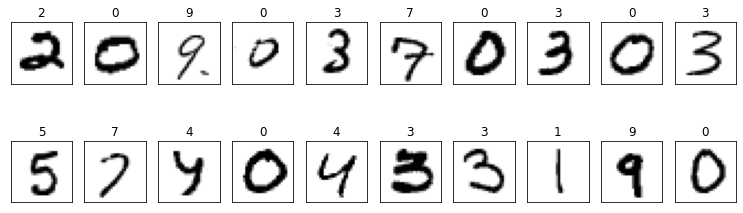

In [13]:
#Visualizing rows of predicted data
i = int(input("How many rows of prediction do you want to see? "))
plot(test_images[:i*10],preds[:i*10])

Saving predictions to CSV file

In [ ]:
gg = pd.DataFrame({"ImageId" : range(1,28001),"Label" : preds})

In [ ]:
gg.to_csv("submission.csv",index=False)

The end